# Data Visualization Tutorial 1

## Import Required Libraries

In [1]:
# import required library functions
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

## Load UN Canadian Immigration Data
### The data is of yearly country wise immigration into Canada from around the globe between 1980 and 2013

In [3]:
# load data, skip the top 20 and bottom 2 rows as they do not contain relevant data
df_canada = pd.read_excel('data/canada.xlsx',
                          sheet_name = 'Canada by Citizenship',
                          skiprows = range(20),
                          skipfooter = 2)

## Explore Dimentions of the Data

In [4]:
# top 5 rows
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
# bottom 5 rows
df_canada.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [6]:
# schema information
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
Type        195 non-null object
Coverage    195 non-null object
OdName      195 non-null object
AREA        195 non-null int64
AreaName    195 non-null object
REG         195 non-null int64
RegName     195 non-null object
DEV         195 non-null int64
DevName     195 non-null object
1980        195 non-null int64
1981        195 non-null int64
1982        195 non-null int64
1983        195 non-null int64
1984        195 non-null int64
1985        195 non-null int64
1986        195 non-null int64
1987        195 non-null int64
1988        195 non-null int64
1989        195 non-null int64
1990        195 non-null int64
1991        195 non-null int64
1992        195 non-null int64
1993        195 non-null int64
1994        195 non-null int64
1995        195 non-null int64
1996        195 non-null int64
1997        195 non-null int64
1998        195 non-null int64
1999        195 non-n

In [7]:
# size of data frame
df_canada.shape

(195, 43)

## Clean and Prepare the Data

In [8]:
# conversion index and columns to lists
df_canada.columns.tolist()
df_canada.index.tolist()

# remove unnecessary columns
# in pandas axis=0 re|presents rows (default) and axis=1 represents columns.
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# rename some columns to make better sense
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [9]:
# convert all column names to strings
df_canada.columns = list(map(str, df_canada.columns))

# full range of the time series
years = list(map(str, range(1980, 2014)))

# add Total column
df_canada['Total'] = df_canada.sum(axis=1)

In [10]:
# size of data frame
df_canada.shape

(195, 39)

## Validate Data

In [11]:
# check for missing data
df_canada.isnull().sum()

# data numerical summary
df_canada.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


## Index the Data
### Enables lookup by country

In [12]:
# index data by country
df_canada.set_index('Country', inplace=True)

In [13]:
# print sample data
print(df_canada.loc['Japan'])
#print(df_canada.loc['Japan', 2000])

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

## Visualize Continuous Time Series

### Visualize immigration from Haiti to Canada from 1980 to 2013.

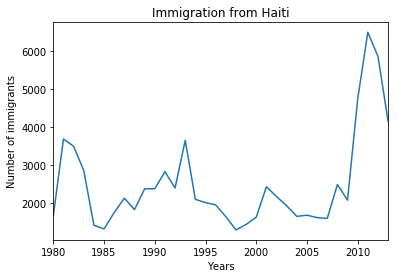

In [14]:
# plot immigration pattern for Haiti
df_canada.loc['Haiti', years].transpose().plot(kind = 'line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

### Visualize immigration from India and China to Canada from 1980 to 2013.

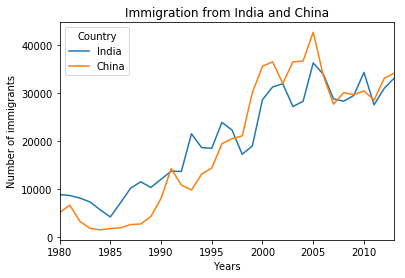

In [15]:
# plot immigration pattern for India and China
df_IndiaChina = df_canada.loc[['India', 'China'], years]
df_IndiaChina.transpose().plot(kind = 'line')
plt.title('Immigration from India and China')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

## Visualize Discrete Data

### Visualize top 5 immigration contributions into Canada

In [16]:
# sort data by Total
df_canada.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# pick top 5 contibutors
df_top5 = df_canada.head(5)['Total']

# print data.
df_top5.head()

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
Name: Total, dtype: int64

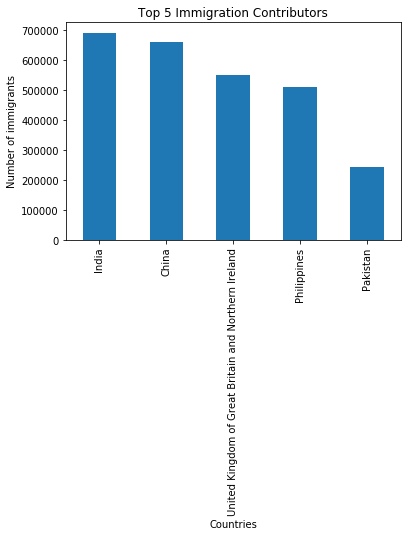

In [17]:
# plot immigration pattern of top 5
df_top5.transpose().plot(kind = 'bar')
plt.title('Top 5 Immigration Contributors')
plt.ylabel('Number of immigrants')
plt.xlabel('Countries')

plt.show()

## Assignment

### Visualize total year wise immigration into Canada from 1980 to 2013 from all sources